First data set: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE81076
Second data set: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE85241

Loading the necessary packages 

In [1]:
import pandas as pd
import sklearn # scikit learn package will be very helpful
import numpy as np

from sklearn.decomposition import PCA  # for PCA
import matplotlib.pyplot as plt  # for plotting variance thresholds to pick the number of principal components to do the PCA with
%matplotlib inline

from sklearn.neighbors import NearestNeighbors  # for finding nearest neighbors between two data sets

In [2]:
import scipy.spatial.distance # for Gaussian smoothing
import math
from numpy.random import randn

Reading in the data sets 

In [3]:
# reading in the first pancreas data set

pancreas_data = pd.read_table("GSE81076_D2_3_7_10_17.txt")  
pancreas_data

C:\Users\annab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
0,A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A1CF__chr10,0.000000,2.007853,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.001958,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.000000,0.000000
3,A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.000000,0.000000
5,A2MP1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,A2M__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,A4GALT__chr22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,A4GNT__chr3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,AAAS__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001958,0.000000,...,0.000000,2.007853,0.000000,0.000000,0.000000,1.001958,1.001958,0.000000,1.001958,0.000000


In [4]:
# reading in the second pancreas data set - gene names are already the row names here

pancreas_data_2 = pd.read_table("GSE85241_cellsystems_dataset_4donors_updated.csv")  
pancreas_data_2

C:\Users\annab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


,D28-1_1,D28-1_2,D28-1_3,D28-1_4,D28-1_5,D28-1_6,D28-1_7,D28-1_8,D28-1_9,D28-1_10,...,D30-8_87,D30-8_88,D30-8_89,D30-8_90,D30-8_91,D30-8_92,D30-8_93,D30-8_94,D30-8_95,D30-8_96
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
A1BG__chr19,0.000000,0.000000,1.001958,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.0,0.000000
A1CF__chr10,6.071431,0.000000,2.007853,6.071431,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.001958,7.097484,3.017717,0.000000,3.017717,0.000000,0.000000,0.0,0.000000
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,2.007853,0.000000,1.001958,0.000000,0.000000,0.000000,0.0,0.000000
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
A2M__chr12,0.000000,5.049473,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,6.071431,0.000000,0.000000,0.000000,11.243324,0.000000,0.000000,7.097484,0.0,0.000000
A4GALT__chr22,0.000000,1.001958,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,2.007853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001958,0.0,0.000000
A4GNT__chr3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
AAAS__chr12,1.001958,0.000000,0.000000,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,2.007853,1.001958,1.001958,0.000000,1.001958,1.001958,0.0,0.000000
AACSP1__chr5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


Modifying the data sets to the needed formats

In [5]:
# setting the gene names as the row names

pancreas_data = pancreas_data.rename(columns = {"Unnamed: 0":"Genes"}) 
pancreas_data.set_index(["Genes"], inplace = True)
pancreas_data

,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,D2ex_10,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1CF__chr10,0.000000,2.007853,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.001958,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.000000,0.000000
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.000000,0.000000
A2MP1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GALT__chr22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001958,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GNT__chr3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Cosine normalization

In [6]:
# for cosine normalization

from sklearn.preprocessing import Normalizer



In [7]:
# cosine normalization of first pancreas data set - gets rid of row names and column names though...

transformer = Normalizer().fit(pancreas_data)
pancreas_data_cnorm = pd.DataFrame(transformer.transform(pancreas_data))
pancreas_data_cnorm

,0,1,2,3,4,5,6,7,8,9,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.066485,0.033177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033177,0.000000,0.000000,0.033177,0.033177,0.033177,0.033177,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121129,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130120,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071012,0.000000,0.000000,...,0.000000,0.142303,0.000000,0.000000,0.000000,0.071012,0.071012,0.000000,0.071012,0.000000


In [8]:
# function adapted from HW1 - cosine normalization 

def normalizing_cells_MaxAbsScaler(data):
    
    """
        input data: data frame with gene expression data  
            columns are the cells and rows are genes
        output data_normalized_data_values: normalized (scaled) data
        function:  dividing the value of each gene for each cell 
                by the maximum value of that cell.
    """
    import sklearn.preprocessing
    
    # creating the list of patients
    cells = data.columns.values
    
    #using Sklearn to scale the data 
    scaler = sklearn.preprocessing.MaxAbsScaler()
    data_scaled = scaler.fit_transform(data)
    
    #creating the dataframe, the output of sklearn MaxAbsScaler is an array
    data_normalized_data_values = pd.DataFrame(data_scaled, columns= cells, index = data.index)
      
    return data_normalized_data_values

In [9]:
# cosine normalization here keeps the gene and cell names in the rows and columns
# cosine normalization for the first pancreas data set

normalized_pancreas = normalizing_cells_MaxAbsScaler(pancreas_data)
normalized_pancreas

,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,D2ex_10,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005776,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1CF__chr10,0.000000,0.001993,0.000941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005776,0.000000,0.000000,0.000880,0.000880,0.000627,0.001313,0.000000,0.000000
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002632,0.000000,0.000000
A2MP1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GALT__chr22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005340,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GNT__chr3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
# cosine normalization here keeps the gene and cell names in the rows and columns
# cosine normalization for the second pancreas data set

normalized_pancreas_2 = normalizing_cells_MaxAbsScaler(pancreas_data_2)
normalized_pancreas_2

,D28-1_1,D28-1_2,D28-1_3,D28-1_4,D28-1_5,D28-1_6,D28-1_7,D28-1_8,D28-1_9,D28-1_10,...,D30-8_87,D30-8_88,D30-8_89,D30-8_90,D30-8_91,D30-8_92,D30-8_93,D30-8_94,D30-8_95,D30-8_96
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
A1BG__chr19,0.000000,0.000000,0.000627,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002492,0.0,0.00000
A1CF__chr10,0.003802,0.000000,0.001257,0.006319,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000627,0.004444,0.002429,0.000000,0.001890,0.000000,0.000000,0.0,0.00000
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.001257,0.000000,0.001505,0.000000,0.000000,0.000000,0.0,0.00000
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
A2M__chr12,0.000000,0.006083,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.010890,0.000000,0.000000,0.000000,0.016887,0.000000,0.000000,0.008809,0.0,0.00000
A4GALT__chr22,0.000000,0.001207,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.003601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001244,0.0,0.00000
A4GNT__chr3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
AAAS__chr12,0.000627,0.000000,0.000000,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.001257,0.000807,0.001505,0.000000,0.001797,0.001244,0.0,0.00000
AACSP1__chr5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000


Adding a batch variable to the data sets 

In [11]:
# adding a batch variable to the first transposed data set

normalized_pancreas_t= normalized_pancreas.transpose()
x = np.array(["1"])
normalized_pancreas_t['batch'] = np.repeat(x, [1728])
normalized_pancreas_t

Genes,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2MP1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D2ex_1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003588,0.000000,0.000000,1
D2ex_2,0.0,0.000000,0.001993,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000994,0.000000,0.000994,0.000000,0.000000,0.000000,1
D2ex_3,0.0,0.000000,0.000941,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000941,0.000000,0.000000,0.002834,0.000000,0.000000,1
D2ex_4,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.007604,0.007604,0.000000,0.038319,0.015237,0.000000,0.000000,1
D2ex_5,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.012049,0.000000,0.012049,0.000000,0.000000,0.000000,1
D2ex_6,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.007604,0.015237,0.000000,0.007604,0.030595,0.000000,0.000000,1
D2ex_7,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008911,0.000000,0.000000,0.000000,1
D2ex_8,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.010770,...,0.000000,0.000000,0.000000,0.021583,0.000000,0.010770,0.010770,0.010770,0.000000,1
D2ex_9,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.005340,0.0,0.000000,...,0.000000,0.000000,0.005340,0.005340,0.000000,0.000000,0.010700,0.000000,0.005340,1
D2ex_10,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [12]:
# adding a batch variable to the second transposed data set

normalized_pancreas_2_t= normalized_pancreas_2.transpose()
y = np.array(["2"])
normalized_pancreas_2_t['batch'] = np.repeat(y, [3072])
normalized_pancreas_2_t

,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,AACSP1__chr5,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D28-1_1,0.0,0.000000,0.003802,0.000000,0.000000,0.000000,0.000000,0.0,0.000627,0.0,...,0.000000,0.000000,0.000627,0.003162,0.000000,0.001257,0.000000,0.000000,0.000000,2
D28-1_2,0.0,0.000000,0.000000,0.000000,0.000000,0.006083,0.001207,0.0,0.000000,0.0,...,0.000000,0.000000,0.001207,0.011037,0.000000,0.007314,0.006083,0.004857,0.001207,2
D28-1_3,0.0,0.000627,0.001257,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,2
D28-1_4,0.0,0.001043,0.006319,0.000000,0.000000,0.000000,0.000000,0.0,0.001043,0.0,...,0.000000,0.000000,0.002090,0.010616,0.001043,0.006319,0.001043,0.003141,0.002090,2
D28-1_5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.011157,0.000000,0.011157,0.000000,0.000000,0.000000,2
D28-1_6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
D28-1_7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
D28-1_8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
D28-1_9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
D28-1_10,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2


Dropping any missing values from the transposed data sets 

In [13]:
# dropping missing values in the first pancreas data set - looks like there aren't any here

normalized_pancreas_t.dropna(axis=1) 
normalized_pancreas_t

Genes,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2MP1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D2ex_1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003588,0.000000,0.000000,1
D2ex_2,0.0,0.000000,0.001993,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000994,0.000000,0.000994,0.000000,0.000000,0.000000,1
D2ex_3,0.0,0.000000,0.000941,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000941,0.000000,0.000000,0.002834,0.000000,0.000000,1
D2ex_4,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.007604,0.007604,0.000000,0.038319,0.015237,0.000000,0.000000,1
D2ex_5,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.012049,0.000000,0.012049,0.000000,0.000000,0.000000,1
D2ex_6,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.007604,0.015237,0.000000,0.007604,0.030595,0.000000,0.000000,1
D2ex_7,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008911,0.000000,0.000000,0.000000,1
D2ex_8,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.010770,...,0.000000,0.000000,0.000000,0.021583,0.000000,0.010770,0.010770,0.010770,0.000000,1
D2ex_9,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.005340,0.0,0.000000,...,0.000000,0.000000,0.005340,0.005340,0.000000,0.000000,0.010700,0.000000,0.005340,1
D2ex_10,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [14]:
# verifying that there are no missing values in the first pancreas data set 

normalized_pancreas_t.isnull().values.any()

False

In [15]:
# dropping missing values in the second pancreas data set - looks like there aren't any here

normalized_pancreas_2_t.dropna(axis=1) 
normalized_pancreas_2_t

,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,AACSP1__chr5,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D28-1_1,0.0,0.000000,0.003802,0.000000,0.000000,0.000000,0.000000,0.0,0.000627,0.0,...,0.000000,0.000000,0.000627,0.003162,0.000000,0.001257,0.000000,0.000000,0.000000,2
D28-1_2,0.0,0.000000,0.000000,0.000000,0.000000,0.006083,0.001207,0.0,0.000000,0.0,...,0.000000,0.000000,0.001207,0.011037,0.000000,0.007314,0.006083,0.004857,0.001207,2
D28-1_3,0.0,0.000627,0.001257,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,2
D28-1_4,0.0,0.001043,0.006319,0.000000,0.000000,0.000000,0.000000,0.0,0.001043,0.0,...,0.000000,0.000000,0.002090,0.010616,0.001043,0.006319,0.001043,0.003141,0.002090,2
D28-1_5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.011157,0.000000,0.011157,0.000000,0.000000,0.000000,2
D28-1_6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
D28-1_7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
D28-1_8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
D28-1_9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
D28-1_10,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2


In [16]:
# verifying that there are no missing values in the second pancreas data set

normalized_pancreas_2_t.isnull().values.any()

False

Merging the two data sets since the PCA is performed on the merged data set with all the batches

In [17]:
# finding the common genes (aka. features) that were measured in the two data sets

common_cols = list(set.intersection(set(normalized_pancreas_t.columns), set(normalized_pancreas_2_t.columns)))
common_cols = [col for col in set(normalized_pancreas_t.columns).intersection(normalized_pancreas_2_t.columns)]

In [18]:
# adjusting the two original data sets to only have the common genes or features

normalized_pancreas_t_adj = normalized_pancreas_t[common_cols]
normalized_pancreas_2_t_adj = normalized_pancreas_2_t[common_cols]

In [19]:
# Viewing the first data set up to this point (cells are now in the rows, genes are now in the columns)

normalized_pancreas_t_adj

Genes,PLP1__chrX,IRF2BP1__chr19,DNM1P35__chr15,PCDHGA12__chr5,TMEM258__chr11,TRPC1__chr3,ARFGAP3__chr22,CLDN10__chr13,AP1B1__chr22,CYP4F35P__chr18,...,RPL10A__chr6,RSAD1__chr17,WSCD2__chr12,ESRRB__chr14,KCNC4__chr1,SLC13A4__chr7,SLC17A4__chr6,LOC254128__chr2,OGFRL1__chr6,STX6__chr1
D2ex_1,0.0,0.000000,0.000000,0.0,0.007190,0.00000,0.003588,0.000000,0.003588,0.0,...,0.047776,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_2,0.0,0.000000,0.000000,0.0,0.002995,0.00000,0.007044,0.000000,0.000994,0.0,...,0.016398,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_3,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,...,0.005703,0.001886,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_4,0.0,0.000000,0.000000,0.0,0.022901,0.00000,0.000000,0.022901,0.007604,0.0,...,0.085323,0.015237,0.0,0.0,0.000000,0.0,0.007604,0.000000,0.000000,0.007604
D2ex_5,0.0,0.000000,0.000000,0.0,0.012049,0.00000,0.000000,0.012049,0.000000,0.0,...,0.085353,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.012049
D2ex_6,0.0,0.000000,0.000000,0.0,0.046075,0.00000,0.015237,0.000000,0.007604,0.0,...,0.101247,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.015237,0.000000
D2ex_7,0.0,0.000000,0.000000,0.0,0.053995,0.00000,0.008911,0.000000,0.008911,0.0,...,0.044907,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_8,0.0,0.000000,0.000000,0.0,0.032439,0.00000,0.000000,0.010770,0.010770,0.0,...,0.065264,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_9,0.0,0.000000,0.000000,0.0,0.037824,0.00534,0.000000,0.032356,0.005340,0.0,...,0.059918,0.005340,0.0,0.0,0.000000,0.0,0.010700,0.000000,0.000000,0.005340
D2ex_10,0.0,0.000000,0.000000,0.0,0.006653,0.00000,0.001653,0.000000,0.001653,0.0,...,0.016833,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [20]:
# Viewing the second data set up to this point (cells are now in the rows, genes are now in the columns)

normalized_pancreas_2_t_adj

,PLP1__chrX,IRF2BP1__chr19,DNM1P35__chr15,PCDHGA12__chr5,TMEM258__chr11,TRPC1__chr3,ARFGAP3__chr22,CLDN10__chr13,AP1B1__chr22,CYP4F35P__chr18,...,RPL10A__chr6,RSAD1__chr17,WSCD2__chr12,ESRRB__chr14,KCNC4__chr1,SLC13A4__chr7,SLC17A4__chr6,LOC254128__chr2,OGFRL1__chr6,STX6__chr1
D28-1_1,0.0,0.0,0.0,0.0,0.002524,0.000627,0.001257,0.000000,0.000000,0.0,...,0.013720,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000627,0.000000,0.000627
D28-1_2,0.0,0.0,0.0,0.0,0.007314,0.000000,0.004857,0.000000,0.002419,0.0,...,0.029032,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.001207,0.000000
D28-1_3,0.0,0.0,0.0,0.0,0.003802,0.000627,0.000627,0.000000,0.000000,0.0,...,0.010345,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D28-1_4,0.0,0.0,0.0,0.0,0.004196,0.001043,0.004196,0.000000,0.002090,0.0,...,0.008459,0.002090,0.000000,0.0,0.000000,0.0,0.000000,0.001043,0.000000,0.001043
D28-1_5,0.0,0.0,0.0,0.0,0.007423,0.000000,0.011157,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.007423
D28-1_6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D28-1_7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D28-1_8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D28-1_9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D28-1_10,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [21]:
# merging the two pancreas data sets into one data set

frames = [normalized_pancreas_t_adj, normalized_pancreas_2_t_adj]

normalized_pancreas_t_merged = pd.concat(frames, ignore_index = False)

In [22]:
# viewing the merged data set to be used for PCA
 
normalized_pancreas_t_merged

Genes,PLP1__chrX,IRF2BP1__chr19,DNM1P35__chr15,PCDHGA12__chr5,TMEM258__chr11,TRPC1__chr3,ARFGAP3__chr22,CLDN10__chr13,AP1B1__chr22,CYP4F35P__chr18,...,RPL10A__chr6,RSAD1__chr17,WSCD2__chr12,ESRRB__chr14,KCNC4__chr1,SLC13A4__chr7,SLC17A4__chr6,LOC254128__chr2,OGFRL1__chr6,STX6__chr1
D2ex_1,0.0,0.0,0.000000,0.0,0.007190,0.000000,0.003588,0.000000,0.003588,0.0,...,0.047776,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_2,0.0,0.0,0.000000,0.0,0.002995,0.000000,0.007044,0.000000,0.000994,0.0,...,0.016398,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.005703,0.001886,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_4,0.0,0.0,0.000000,0.0,0.022901,0.000000,0.000000,0.022901,0.007604,0.0,...,0.085323,0.015237,0.000000,0.0,0.000000,0.0,0.007604,0.000000,0.000000,0.007604
D2ex_5,0.0,0.0,0.000000,0.0,0.012049,0.000000,0.000000,0.012049,0.000000,0.0,...,0.085353,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.012049
D2ex_6,0.0,0.0,0.000000,0.0,0.046075,0.000000,0.015237,0.000000,0.007604,0.0,...,0.101247,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.015237,0.000000
D2ex_7,0.0,0.0,0.000000,0.0,0.053995,0.000000,0.008911,0.000000,0.008911,0.0,...,0.044907,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_8,0.0,0.0,0.000000,0.0,0.032439,0.000000,0.000000,0.010770,0.010770,0.0,...,0.065264,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_9,0.0,0.0,0.000000,0.0,0.037824,0.005340,0.000000,0.032356,0.005340,0.0,...,0.059918,0.005340,0.000000,0.0,0.000000,0.0,0.010700,0.000000,0.000000,0.005340
D2ex_10,0.0,0.0,0.000000,0.0,0.006653,0.000000,0.001653,0.000000,0.001653,0.0,...,0.016833,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [23]:
# storing the batch values for the different cells in a vector

batch_labels = normalized_pancreas_t_merged['batch']

batch_labels

D2ex_1      1
D2ex_2      1
D2ex_3      1
D2ex_4      1
D2ex_5      1
D2ex_6      1
D2ex_7      1
D2ex_8      1
D2ex_9      1
D2ex_10     1
D2ex_11     1
D2ex_12     1
D2ex_13     1
D2ex_14     1
D2ex_15     1
D2ex_16     1
D2ex_17     1
D2ex_18     1
D2ex_19     1
D2ex_20     1
D2ex_21     1
D2ex_22     1
D2ex_23     1
D2ex_24     1
D2ex_25     1
D2ex_26     1
D2ex_27     1
D2ex_28     1
D2ex_29     1
D2ex_30     1
           ..
D30-8_67    2
D30-8_68    2
D30-8_69    2
D30-8_70    2
D30-8_71    2
D30-8_72    2
D30-8_73    2
D30-8_74    2
D30-8_75    2
D30-8_76    2
D30-8_77    2
D30-8_78    2
D30-8_79    2
D30-8_80    2
D30-8_81    2
D30-8_82    2
D30-8_83    2
D30-8_84    2
D30-8_85    2
D30-8_86    2
D30-8_87    2
D30-8_88    2
D30-8_89    2
D30-8_90    2
D30-8_91    2
D30-8_92    2
D30-8_93    2
D30-8_94    2
D30-8_95    2
D30-8_96    2
Name: batch, Length: 4800, dtype: object

In [24]:
# dropping the batch column from the data set - produces final merged data set ready for PCA

normalized_pancreas_t_merged_final = normalized_pancreas_t_merged.drop(['batch'], axis = 1)
normalized_pancreas_t_merged_final

Genes,PLP1__chrX,IRF2BP1__chr19,DNM1P35__chr15,PCDHGA12__chr5,TMEM258__chr11,TRPC1__chr3,ARFGAP3__chr22,CLDN10__chr13,AP1B1__chr22,CYP4F35P__chr18,...,RPL10A__chr6,RSAD1__chr17,WSCD2__chr12,ESRRB__chr14,KCNC4__chr1,SLC13A4__chr7,SLC17A4__chr6,LOC254128__chr2,OGFRL1__chr6,STX6__chr1
D2ex_1,0.0,0.0,0.000000,0.0,0.007190,0.000000,0.003588,0.000000,0.003588,0.0,...,0.047776,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_2,0.0,0.0,0.000000,0.0,0.002995,0.000000,0.007044,0.000000,0.000994,0.0,...,0.016398,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.005703,0.001886,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_4,0.0,0.0,0.000000,0.0,0.022901,0.000000,0.000000,0.022901,0.007604,0.0,...,0.085323,0.015237,0.000000,0.0,0.000000,0.0,0.007604,0.000000,0.000000,0.007604
D2ex_5,0.0,0.0,0.000000,0.0,0.012049,0.000000,0.000000,0.012049,0.000000,0.0,...,0.085353,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.012049
D2ex_6,0.0,0.0,0.000000,0.0,0.046075,0.000000,0.015237,0.000000,0.007604,0.0,...,0.101247,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.015237,0.000000
D2ex_7,0.0,0.0,0.000000,0.0,0.053995,0.000000,0.008911,0.000000,0.008911,0.0,...,0.044907,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_8,0.0,0.0,0.000000,0.0,0.032439,0.000000,0.000000,0.010770,0.010770,0.0,...,0.065264,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
D2ex_9,0.0,0.0,0.000000,0.0,0.037824,0.005340,0.000000,0.032356,0.005340,0.0,...,0.059918,0.005340,0.000000,0.0,0.000000,0.0,0.010700,0.000000,0.000000,0.005340
D2ex_10,0.0,0.0,0.000000,0.0,0.006653,0.000000,0.001653,0.000000,0.001653,0.0,...,0.016833,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


PCA

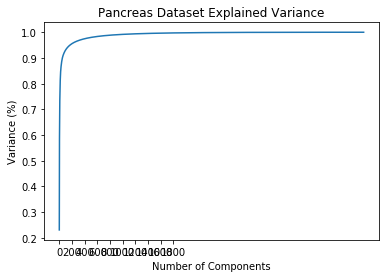

In [25]:
# graph to determine how many principal components should be used for PCA of the merged data set

#Fitting the PCA algorithm with our Data
pca = PCA().fit(normalized_pancreas_t_merged_final)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800])
plt.ylabel('Variance (%)') #for each component
plt.title('Pancreas Dataset Explained Variance')
plt.show()

# Plot shows that we could do PCA with 100 principal components (could explain 95% of variance)


In [26]:
pca_2 = PCA(n_components=100)
#n_components < min(n_samples, n_features) = min(4800, 18578)

In [27]:
principalComponents = pca_2.fit_transform(normalized_pancreas_t_merged_final)

In [28]:
PCs_df = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2','pc 3','pc 4','pc 5','pc 6','pc 7','pc 8','pc 9','pc 10',
                         'pc 11', 'pc 12','pc 13','pc 14','pc 15','pc 16','pc 17','pc 18','pc 19','pc 20',
                         'pc 21', 'pc 22','pc 23','pc 24','pc 25','pc 26','pc 27','pc 28','pc 29','pc 30',
                         'pc 31', 'pc 32','pc 33','pc 34','pc 35','pc 36','pc 37','pc 38','pc 39','pc 40',
                         'pc 41', 'pc 42','pc 43','pc 44','pc 45','pc 46','pc 47','pc 48','pc 49','pc 50',
                         'pc 51', 'pc 52','pc 53','pc 54','pc 55','pc 56','pc 57','pc 58','pc 59','pc 60',
                         'pc 61', 'pc 62','pc 63','pc 64','pc 65','pc 66','pc 67','pc 68','pc 69','pc 70',
                         'pc 71', 'pc 72','pc 73','pc 74','pc 75','pc 76','pc 77','pc 78','pc 79','pc 80',
                         'pc 81', 'pc 82','pc 83','pc 84','pc 85','pc 86','pc 87','pc 88','pc 89','pc 90',
                         'pc 91', 'pc 92','pc 93','pc 94','pc 95','pc 96','pc 97','pc 98','pc 99','pc 100'],
                     index = normalized_pancreas_t_merged_final.index)

In [29]:
# viewing the gene expression values in the PC space now

PCs_df.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 91,pc 92,pc 93,pc 94,pc 95,pc 96,pc 97,pc 98,pc 99,pc 100
D2ex_1,-0.072723,0.668857,0.790823,0.274106,-0.464448,0.454265,0.370764,0.090676,0.099212,0.212742,...,0.011604,-0.018284,0.039314,-0.008091,0.001721,-0.006545,-0.051175,0.012354,0.027224,-0.045662
D2ex_2,0.081012,0.046200,1.289617,0.020126,0.057211,0.036148,-0.026195,0.040847,-0.065980,-0.014006,...,0.005435,0.024841,-0.008647,-0.014369,-0.003254,-0.011724,0.004024,-0.003617,-0.000513,0.015284
D2ex_3,0.032595,-0.090623,1.244084,-0.053024,0.022476,0.011463,-0.113080,0.053053,-0.115116,0.056880,...,-0.005278,-0.000644,0.003662,-0.007109,-0.000499,0.017646,0.010074,0.006634,0.016356,0.001938
D2ex_4,0.492118,2.114689,-0.556512,0.732365,-0.669931,-0.151352,-0.228741,-0.438721,-0.395533,-0.009867,...,0.006487,0.034637,-0.089808,0.049850,0.035091,0.138599,-0.075003,-0.023179,0.020761,0.001345
D2ex_5,0.004925,1.646718,-0.249257,0.729063,-0.626255,0.115957,-0.069345,-0.570131,-0.002746,-0.115466,...,-0.077000,0.036940,0.009111,-0.128942,0.123987,0.041493,0.108208,-0.017752,-0.112980,0.027201


In [30]:
# PC space for cells in first pancreas data set (aka. first batch)

PCs_df1 = PCs_df[0:1728]
PCs_df1

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 91,pc 92,pc 93,pc 94,pc 95,pc 96,pc 97,pc 98,pc 99,pc 100
D2ex_1,-0.072723,0.668857,0.790823,0.274106,-0.464448,0.454265,0.370764,0.090676,0.099212,0.212742,...,0.011604,-0.018284,0.039314,-0.008091,0.001721,-0.006545,-0.051175,0.012354,0.027224,-0.045662
D2ex_2,0.081012,0.046200,1.289617,0.020126,0.057211,0.036148,-0.026195,0.040847,-0.065980,-0.014006,...,0.005435,0.024841,-0.008647,-0.014369,-0.003254,-0.011724,0.004024,-0.003617,-0.000513,0.015284
D2ex_3,0.032595,-0.090623,1.244084,-0.053024,0.022476,0.011463,-0.113080,0.053053,-0.115116,0.056880,...,-0.005278,-0.000644,0.003662,-0.007109,-0.000499,0.017646,0.010074,0.006634,0.016356,0.001938
D2ex_4,0.492118,2.114689,-0.556512,0.732365,-0.669931,-0.151352,-0.228741,-0.438721,-0.395533,-0.009867,...,0.006487,0.034637,-0.089808,0.049850,0.035091,0.138599,-0.075003,-0.023179,0.020761,0.001345
D2ex_5,0.004925,1.646718,-0.249257,0.729063,-0.626255,0.115957,-0.069345,-0.570131,-0.002746,-0.115466,...,-0.077000,0.036940,0.009111,-0.128942,0.123987,0.041493,0.108208,-0.017752,-0.112980,0.027201
D2ex_6,0.114175,1.315258,-0.234309,0.412871,-0.716342,0.163778,0.095002,-0.046640,-0.022907,0.230332,...,0.017379,0.030630,0.134792,0.048022,-0.011808,-0.019352,0.033623,0.002355,-0.006378,-0.135283
D2ex_7,0.365190,1.540572,-0.332578,0.379495,-0.468883,0.302972,0.093602,-0.176308,0.114052,0.074013,...,0.020935,0.022714,-0.038796,0.007578,0.017089,0.085609,-0.034402,0.081475,0.085649,-0.075887
D2ex_8,0.059163,1.271910,-0.231699,0.572302,-0.590350,0.008417,-0.106282,-0.457424,0.186922,0.151587,...,-0.060124,-0.077826,-0.018978,-0.086584,-0.017034,0.001526,0.025963,-0.018820,0.032941,-0.021860
D2ex_9,0.200877,1.215911,-0.309516,0.357222,-0.349328,0.039675,-0.246636,-0.374906,0.105369,-0.054701,...,-0.151412,0.070908,0.051801,0.044032,0.063227,0.117235,-0.089517,-0.067194,-0.186254,0.017864
D2ex_10,0.089170,0.024926,1.001607,-0.025839,-0.103175,0.085620,-0.119111,-0.029610,0.020795,0.092826,...,-0.014698,0.006935,-0.017658,-0.002512,-0.002382,0.002179,-0.001009,0.009542,-0.001389,-0.004243


In [31]:
# PC space for cells in second pancreas data set (aka. second batch)

PCs_df2 = PCs_df[1728:4800]
PCs_df2

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 91,pc 92,pc 93,pc 94,pc 95,pc 96,pc 97,pc 98,pc 99,pc 100
D28-1_1,0.735398,-0.629847,-0.258759,0.490560,0.200020,0.026380,-0.048030,-0.230922,0.316357,-0.149915,...,0.003361,-0.002199,0.002204,-0.004224,-0.005946,-0.004032,0.006622,0.001485,-0.010999,0.006245
D28-1_2,0.546752,0.408884,-0.196091,-0.260663,0.060021,-0.051528,-0.369764,-0.002785,0.288433,-0.236814,...,-0.014874,0.011898,0.007389,0.008872,-0.033643,-0.024341,-0.028089,0.024925,0.023811,0.013255
D28-1_3,0.175672,-0.271063,0.121680,-0.705740,-0.344588,-0.491705,0.277108,-0.219563,0.014685,0.009728,...,-0.003501,-0.000212,-0.004391,0.007482,-0.002407,-0.000439,-0.003250,0.000947,-0.004688,0.000875
D28-1_4,0.644731,0.229021,-0.312376,-0.353938,0.428005,0.052794,-0.152001,-0.101647,0.147630,-0.004108,...,0.007073,0.017302,-0.017817,-0.007937,0.021604,-0.005754,-0.019493,0.013161,-0.029878,0.004145
D28-1_5,0.373610,0.567101,-0.129452,0.074523,-0.022060,-0.261041,-0.118689,-0.355482,0.204785,-0.240418,...,0.128628,0.203190,-0.066454,-0.250243,-0.322323,-0.029805,0.684003,-0.420737,-0.092480,-0.234835
D28-1_6,-1.024440,-0.284435,-0.083792,-0.043338,0.127176,-0.123239,0.036233,0.068439,0.023482,-0.191468,...,0.007021,0.001485,0.006529,0.005319,0.000093,-0.001584,0.002010,0.004322,-0.005864,0.000425
D28-1_7,-1.142837,-0.272100,-0.093150,-0.157109,0.067018,-0.115946,-0.007209,0.058032,0.025174,-0.161121,...,-0.003058,0.002054,0.000040,0.001885,0.008275,-0.000802,0.005964,0.002587,-0.010371,-0.004032
D28-1_8,-1.216959,-0.269217,-0.099440,-0.086601,0.121958,-0.054409,-0.038722,0.084984,0.003415,-0.119965,...,-0.011203,-0.003493,0.006033,-0.000726,0.003472,-0.000083,-0.001048,-0.008765,0.006138,0.005784
D28-1_9,-1.112282,-0.302724,-0.084797,-0.119026,0.064359,-0.072817,-0.037768,0.076315,0.001959,-0.121711,...,-0.000459,0.004851,-0.001982,-0.003173,0.003912,-0.004324,0.003453,0.007144,-0.007442,-0.001682
D28-1_10,-0.998251,-0.287829,-0.055458,-0.173301,0.047879,-0.114368,-0.016801,0.035351,0.007080,-0.094704,...,-0.015527,-0.005794,0.004759,0.007475,0.002002,-0.003496,-0.006599,-0.014066,0.019927,0.009476


Performing the Nearest Neighbors Algorithm 

In [32]:
# Finding the nearest neighbors of cells from batch 2 to cells in batch 1 and saving the indices of the nearest neighbors in batch 1

NN1 = NearestNeighbors(n_neighbors = 20, algorithm = "kd_tree").fit(PCs_df1)
dist1, indices1 = NN1.kneighbors(PCs_df2)
indices1

array([[1447, 1683, 1381, ..., 1469, 1219, 1380],
       [1382,  853, 1477, ..., 1439, 1448, 1258],
       [1478, 1068, 1493, ..., 1500,  842, 1212],
       ...,
       [1287,  582, 1281, ...,  620, 1484, 1382],
       [ 767, 1078, 1116, ..., 1096, 1213,  929],
       [ 767, 1116, 1078, ...,  721, 1193, 1228]], dtype=int64)

In [33]:
# Finding the nearest neighbors of cells from batch 1 to cells in batch 2 and saving the indices of the nearest neighbors in batch 2

NN2 = NearestNeighbors(n_neighbors = 20, algorithm = "kd_tree").fit(PCs_df2)
dist2, indices2 = NN2.kneighbors(PCs_df1)
indices2

array([[2773,  965, 2154, ...,  144, 1796,   61],
       [2823, 2322, 2732, ..., 1579,  603,  281],
       [3011,  266, 2247, ..., 1790, 1914, 1706],
       ...,
       [ 813, 3054, 2645, ..., 1559, 2219,  829],
       [2700, 2098,  990, ...,  829, 2770, 1298],
       [1979, 1923, 2039, ..., 2077, 1767, 2586]], dtype=int64)

In [34]:
# array of 0's and 1's, with 1's indicating a k-nearest neighbor of a cell in batch 2

graph1 = NN1.kneighbors_graph(PCs_df2).toarray()
graph1

# rows in the matrix output below are the indices of cells in data set 2, columns in the matrix output below are
# indices of cells in data set 1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
# array of 0's and 1's, with 1's indicating a k-nearest neighbor of a cell in batch 1

graph2 = NN2.kneighbors_graph(PCs_df1).toarray()
graph2

# rows in the matrix output below are the indices of cells in data set 1, columns in the matrix output below are
# indices of cells in data set 2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
# transposing one of the arrays of 0's and 1's to allow for element-wise multiplication in the next step

data1T = np.transpose(graph1)


In [37]:
# element-wise multiplication of the two arrays of 0's and 1's 

W = np.multiply(data1T,graph2)    

In [38]:
# first array in tuple holds the indices of cells in batch 1 in the MNN pairs
# second array in tuple holds the indices of cells in batch 2 in the MNN pairs

Windices = (W>0).nonzero()
Windices

(array([   0,    1,    1, ..., 1724, 1724, 1724], dtype=int64),
 array([2773,  256,  276, ..., 1866, 1976, 2672], dtype=int64))

In [39]:
# batch correction vectors for MNN pairs

correction_vectors = {}
for key in range(0,len(indices2)):
    #breakpoint()
    correction_vectors[key] = {}
    dist = list(dist2[key])
    indices = list(indices2[key])
    for i in range(0,len(dist)):
        correction_vectors[key][indices[i]] = dist[i]

In [40]:
# saving the distances of the MNN pairs in a list

distances = []

for i in range(0,len(Windices[0])):
    one = Windices[0][i]
    two = Windices[1][i]
    distances.append(correction_vectors[one][two])

In [41]:
# Gaussian kernel attempts

distances_pancreas_2 = scipy.spatial.distance.pdist(PCs_df2)
distances_pancreas_2

array([1.55254894, 1.68595784, 1.29673058, ..., 2.63977897, 2.60656903,
       0.35136228])

In [42]:
sigma = 0.1
G = np.exp(-distances_pancreas_2 ** 2 / sigma)
G

array([3.40196701e-11, 4.52251357e-13, 4.98074139e-08, ...,
       5.45104749e-31, 3.11282786e-30, 2.90964361e-01])

In [43]:
G_adj = (G+np.transpose(G))/2
G_adj

array([3.40196701e-11, 4.52251357e-13, 4.98074139e-08, ...,
       5.45104749e-31, 3.11282786e-30, 2.90964361e-01])

In [44]:
D = sum(G_adj)
D

91263.22301385191

In [45]:
PCs_df2 = pd.DataFrame(PCs_df2)

In [46]:
PCs_df2.value_counts(sort = False)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [47]:
gaussian_values = randn(8087)

In [48]:
distances * gaussian_values

ValueError: operands could not be broadcast together with shapes (8084,) (8087,) 

In [49]:
A2 = pd.Series(Windices[1])

In [50]:
A2_counts = A2.value_counts(bins = 3072)
A2_counts

(1561.983, 1562.982]    20
(1789.835, 1790.834]    20
(2763.201, 2764.2]      20
(1822.813, 1823.812]    20
(1831.807, 1832.807]    20
(2038.673, 2039.672]    20
(2938.087, 2939.086]    20
(2027.68, 2028.679]     20
(115.925, 116.924]      20
(828.461, 829.46]       20
(905.411, 906.41]       20
(2246.537, 2247.536]    20
(302.803, 303.803]      20
(838.454, 839.454]      20
(1064.307, 1065.307]    20
(1913.754, 1914.753]    20
(2496.374, 2497.374]    20
(3010.04, 3011.039]     20
(1978.712, 1979.711]    20
(1922.748, 1923.747]    20
(1475.04, 1476.039]     20
(2437.413, 2438.412]    20
(265.827, 266.827]      20
(2193.572, 2194.571]    20
(2321.488, 2322.488]    20
(962.374, 963.373]      20
(2213.559, 2214.558]    20
(1957.725, 1958.725]    20
(1539.997, 1540.997]    20
(2148.601, 2149.6]      20
                        ..
(1331.133, 1332.133]     0
(1329.135, 1330.134]     0
(2552.338, 2553.337]     0
(1328.135, 1329.135]     0
(2551.339, 2552.338]     0
(2550.339, 2551.339]     0
(

In [51]:
norm.dens = G_adj/(D*A2_counts)

ValueError: operands could not be broadcast together with shapes (4717056,) (3072,) 